In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
from packaging.version import parse as version
print(version(sns.__version__)>= version('0.9.0'))
print(version(pd.__version__)>=version('0.23.4'))
print(version(np.__version__)>=version('1.15.4'))

True
True
True


In [3]:
#reading data from folder

df=pd.read_csv('D:\Download\movies.csv')

In [4]:
df.head().T

,0,1,2,3,4
name,The Shining,The Blue Lagoon,Star Wars: Episode V - The Empire Strikes Back,Airplane!,Caddyshack
rating,R,R,PG,PG,R
genre,Drama,Adventure,Action,Comedy,Comedy
year,1980,1980,1980,1980,1980
released,"June 13, 1980 (United States)","July 2, 1980 (United States)","June 20, 1980 (United States)","July 2, 1980 (United States)","July 25, 1980 (United States)"
score,8.4,5.8,8.7,7.7,7.3
votes,927000.0,65000.0,1200000.0,221000.0,108000.0
director,Stanley Kubrick,Randal Kleiser,Irvin Kershner,Jim Abrahams,Harold Ramis
writer,Stephen King,Henry De Vere Stacpoole,Leigh Brackett,Jim Abrahams,Brian Doyle-Murray
star,Jack Nicholson,Brooke Shields,Mark Hamill,Robert Hays,Chevy Chase


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
#Checking for Nan / missing values in columns
df.isnull().sum(axis=0)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
#Checking total NaN in dataframe
df.isnull().values.sum()

2473

In [10]:
# We are now filling in values for released column as an example
df[df['released'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [11]:
df.loc[df['name'] == "Saw: The Final Chapter",'released'] = 'October 29, 2010 (United States)'

In [12]:
df.loc[df['name'] == "The Wolfman" ,'released'] = 'February 12, 2010 (United States)'

In [13]:
df[df['released'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [14]:
# we want to extract only Year from 'released' columns. Using str.partition will allow us to do so. Once we have extracted the year, we convert in to int.

df['year_corrected'] = df['released'].str.partition("(")[0]
df['year_corrected'] = df['year_corrected'].str[-5:-1].astype('int64')

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [16]:
# Now, we are checking if column 'year' and 'year corrected' are of equal values. We have false so, some values are not similar
df['year'].equals(df['year_corrected']) 

False

In [17]:
# We are now checking the amount of columns where the year are similar btw the 2 columns
df["equal"]  = np.where(df['year'] == df['year_corrected'], True, False)

In [18]:
df.loc[df['equal'] == False]

# So we will be using year_corrected column for year data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected,equal
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981,False
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0,1984,False
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000.0,3484523.0,Partisan Productions,219.0,1981,False
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000.0,534816.0,Cattle Annie Productions,97.0,1981,False
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700.0,John Hough,Brian Clemens,Bette Davis,United States,NaN,5000000.0,Walt Disney Productions,84.0,1981,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000.0,193457467.0,"""Weathering With You"" Film Partners",112.0,2020,False
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,NaN,682.0,Roxwell Films,93.0,2020,False
7584,"Faith, Hope & Love",PG,Comedy,2019,"February 4, 2020 (Australia)",6.2,719.0,J.J. Englert,Robert Krantz,Peta Murgatroyd,United States,NaN,210091.0,Ellinas Multimedia,106.0,2020,False
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.4,4400.0,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000.0,226421.0,Emphatic Films,83.0,2020,False


In [19]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected,equal
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009,True
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019,True
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015,True
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020,True
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020,True
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020,True
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020,True


In [20]:
pd.set_option('display.max_rows',None)

In [21]:
# Next we will be checking the unique values in rating

df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [22]:
df.loc[df['rating'] == 'Not Rated', 'rating'] = 'Unrated'
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Unrated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [23]:
df.head()

df_cleaned = df

df_cleaned = df_cleaned.drop(['year','equal'],axis=1)

In [24]:
df_cleaned.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [25]:
# Prediciton

# more budget, more gross revenue
# more popular company, more gross revenue


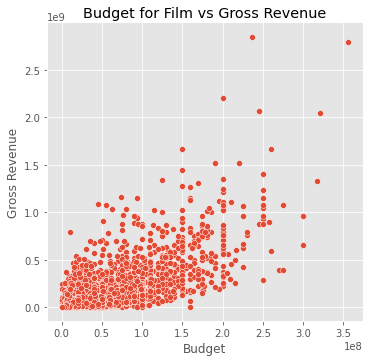

In [26]:
# Plotting scatter plot to investigate the relationship btw budget vs gross revenue

sns.relplot(x="budget", y="gross", data=df_cleaned)
plt.title("Budget for Film vs Gross Revenue")
plt.xlabel('Budget')
plt.ylabel('Gross Revenue');

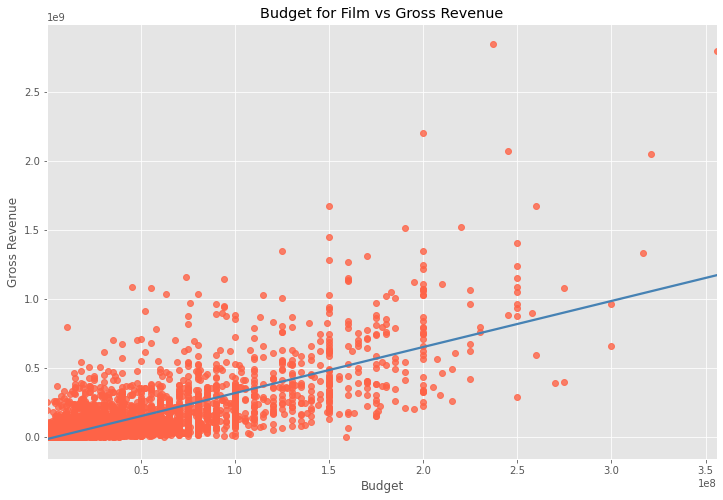

In [27]:
sns.regplot(x="budget", y="gross", data=df_cleaned, ci=False, scatter_kws={"color":"tomato"},line_kws={"color":"steelblue"})
plt.title("Budget for Film vs Gross Revenue")
plt.xlabel('Budget')
plt.ylabel('Gross Revenue');

In [28]:
df_cleaned.corr(method='pearson').replace({1.0:None}) #method = pearson, kendall, spearman

,score,votes,budget,gross,runtime,year_corrected
score,None,0.409182,0.076254,0.186258,0.399451,0.105821
votes,0.409182,None,0.442429,0.630757,0.309212,0.218422
budget,0.076254,0.442429,None,0.740395,0.320447,0.321918
gross,0.186258,0.630757,0.740395,None,0.245216,0.250514
runtime,0.399451,0.309212,0.320447,0.245216,None,0.120636
year_corrected,0.105821,0.218422,0.321918,0.250514,0.120636,None


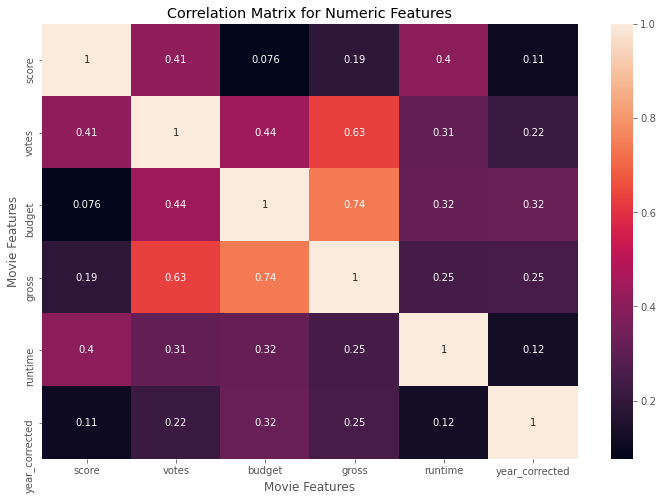

In [29]:
sns.heatmap(df_cleaned.corr(method='pearson'), annot= True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [30]:
df_numerised = df_cleaned

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == "object"):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,6587,5,6,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980
1,5573,5,1,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980
2,5142,3,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980
3,286,3,4,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980
4,1027,5,4,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980


In [31]:
#checking if data in df_numerised == original data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected,equal
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,True
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,True
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,True
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,True
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,True


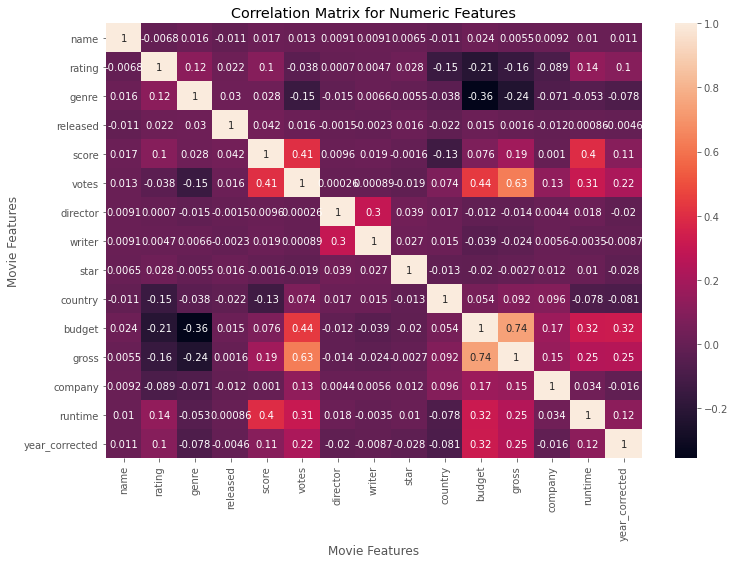

In [32]:
sns.heatmap(df_numerised.corr(method='pearson'), annot= True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [33]:
df_numerised.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
name,1.000000,-0.006801,0.016355,-0.010967,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010900
rating,-0.006801,1.000000,0.116926,0.021502,0.102324,-0.037846,0.000702,0.004711,0.027782,-0.148442,-0.213744,-0.159047,-0.088965,0.139781,0.103106
genre,0.016355,0.116926,1.000000,0.030133,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.077751
released,-0.010967,0.021502,0.030133,1.000000,0.042396,0.016105,-0.001467,-0.002298,0.016203,-0.022157,0.014654,0.001633,-0.011522,0.000862,-0.004583
score,0.017097,0.102324,0.027965,0.042396,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.105821
votes,0.013088,-0.037846,-0.145307,0.016105,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218422
director,0.009079,0.000702,-0.015258,-0.001467,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020432
writer,0.009081,0.004711,0.006567,-0.002298,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008701
star,0.006472,0.027782,-0.005477,0.016203,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027594
country,-0.010737,-0.148442,-0.037615,-0.022157,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.054063,0.092129,0.095548,-0.078412,-0.081448


In [34]:
correlation_matrix = df_numerised.corr()

corr_pairs = correlation_matrix.unstack()
corr_pairs

name            name              1.000000
                rating           -0.006801
                genre             0.016355
                released         -0.010967
                score             0.017097
                votes             0.013088
                director          0.009079
                writer            0.009081
                star              0.006472
                country          -0.010737
                budget            0.023970
                gross             0.005533
                company           0.009211
                runtime           0.010392
                year_corrected    0.010900
rating          name             -0.006801
                rating            1.000000
                genre             0.116926
                released          0.021502
                score             0.102324
                votes            -0.037846
                director          0.000702
                writer            0.004711
           

In [35]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre           budget           -0.356564
budget          genre            -0.356564
gross           genre            -0.235650
genre           gross            -0.235650
rating          budget           -0.213744
budget          rating           -0.213744
gross           rating           -0.159047
rating          gross            -0.159047
                country          -0.148442
country         rating           -0.148442
votes           genre            -0.145307
genre           votes            -0.145307
score           country          -0.133348
country         score            -0.133348
rating          company          -0.088965
company         rating           -0.088965
year_corrected  country          -0.081448
country         year_corrected   -0.081448
runtime         country          -0.078412
country         runtime          -0.078412
year_corrected  genre            -0.077751
genre           year_corrected   -0.077751
company         genre            -0.071067
genre      

In [36]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes           gross             0.630757
gross           votes             0.630757
budget          gross             0.740395
gross           budget            0.740395
name            name              1.000000
writer          writer            1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

In [37]:
 # votes and budget have highest correlation to gross revenue
 # company does not effect gross revenue

In [38]:
df_aggregate = df_cleaned.groupby("year_corrected").agg({'budget':["sum","mean"],'gross':['sum',"mean"],'score':['mean'],'name':['count']})
df_aggregate

budget                       gross                \
                         sum          mean           sum          mean   
year_corrected                                                           
1980            4.117500e+08  1.029375e+07  2.329467e+09  3.147929e+07   
1981            7.216000e+08  1.182951e+07  2.253569e+09  2.476449e+07   
1982            8.722850e+08  1.194911e+07  3.440553e+09  2.820125e+07   
1983            9.006106e+08  9.683985e+06  2.707176e+09  2.098586e+07   
1984            1.137476e+09  1.278063e+07  3.631932e+09  2.373812e+07   
1985            1.220560e+09  1.220560e+07  3.561043e+09  2.119669e+07   
1986            1.262176e+09  1.262176e+07  3.601619e+09  1.925999e+07   
1987            1.370723e+09  1.257544e+07  4.004614e+09  2.200337e+07   
1988            1.646830e+09  1.328089e+07  4.817977e+09  2.549194e+07   
1989            1.818518e+09  1.466546e+07  5.959968e+09  3.136825e+07   
1990            1.965366e+09  1.786696e+07  7.044777e+09  3.767260e+07   
1991            2.332371e+09  1.959976e+07  6.204726e+09  3.133700e+07   
1992            2.561403e+09  2.049122e+07  7.172257e+09  3.919266e+07   
1993            2.558225e+09  1.840450e+07  7.670683e+09  3.974447e+07   
1994            3.397255e+09  2.497981e+07  9.417467e+09  4.616405e+07   
1995            3.520136e+09  2.514383e+07  9.250755e+09  4.625377e+07   
1996            4.125028e+09  2.884635e+07  1.004512e+10  5.073294e+07   
1997            5.242415e+09  3.542172e+07  1.300882e+10  6.637154e+07   
1998            5.358060e+09  3.596013e+07  1.078334e+10  5.446133e+07   
1999            6.550176e+09  4.068432e+07  1.360200e+10  7.196825e+07   
2000            6.561400e+09  3.952651e+07  1.302912e+10  6.647510e+07   
2001            6.338250e+09  3.912500e+07  1.516184e+10  7.468888e+07   
2002            6.411079e+09  3.771223e+07  1.658594e+10  8.593749e+07   
2003            6.750850e+09  4.018363e+07  1.870103e+10  9.034313e+07   
2004            6.923170e+09  4.354195e+07  1.823809e+10  9.548736e+07   
2005            7.083287e+09  4.454897e+07  1.806237e+10  9.031187e+07   
2006            6.893594e+09  4.255305e+07  1.829464e+10  9.334002e+07   
2007            7.370895e+09  4.440298e+07  2.099901e+10  9.952139e+07   
2008            7.330300e+09  4.363274e+07  2.092612e+10  1.030843e+08   
2009            7.572945e+09  4.562015e+07  2.437956e+10  1.269769e+08   
2010            7.748600e+09  4.783086e+07  2.330345e+10  1.207432e+08   
2011            7.923770e+09  4.661041e+07  2.435060e+10  1.154057e+08   
2012            7.666705e+09  4.821827e+07  2.583063e+10  1.345346e+08   
2013            8.195300e+09  5.090248e+07  2.591395e+10  1.295697e+08   
2014            7.227370e+09  4.489050e+07  2.516504e+10  1.283931e+08   
2015            7.494926e+09  4.570077e+07  2.786500e+10  1.314387e+08   
2016            8.301700e+09  5.221195e+07  2.777828e+10  1.402944e+08   
2017            8.062800e+09  5.522466e+07  2.981339e+10  1.468640e+08   
2018            7.112380e+09  4.939153e+07  2.856557e+10  1.393443e+08   
2019            6.725850e+09  5.424073e+07  3.019710e+10  1.342093e+08   
2020            9.694158e+08  5.385643e+07  3.436940e+09  1.636638e+08   

                   score  name  
                    mean count  
year_corrected                  
1980            6.265000    80  
1981            6.231068   103  
1982            6.292188   128  
1983            6.080000   145  
1984            6.150955   157  
1985            6.318579   183  
1986            6.155924   211  
1987            6.195918   196  
1988            6.236683   199  
1989            6.186500   200  
1990            6.314213   197  
1991            6.409314   204  
1992            6.387500   184  
1993            6.371000   200  
1994            6.269417   206  
1995            6.412315   203  
1996            6.303015   199  
1997            6.347475   198  
1998            6.448780   205  
1999            6.511224   196  
2000  

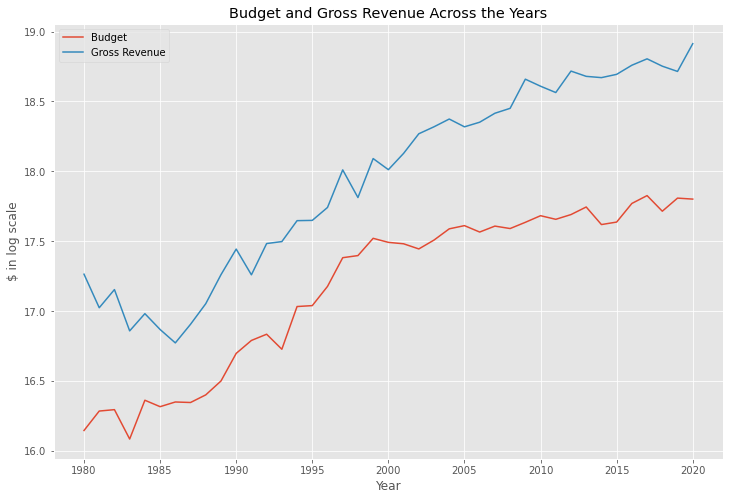

In [39]:
sns.lineplot(data=df_aggregate,x='year_corrected',y=np.log(df_aggregate['budget']['mean']))
sns.lineplot(data=df_aggregate,x='year_corrected',y=np.log(df_aggregate['gross']['mean']))
plt.title('Budget and Gross Revenue Across the Years')
plt.xlabel('Year')
plt.ylabel('$ in log scale')
plt.legend(labels=["Budget","Gross Revenue"])

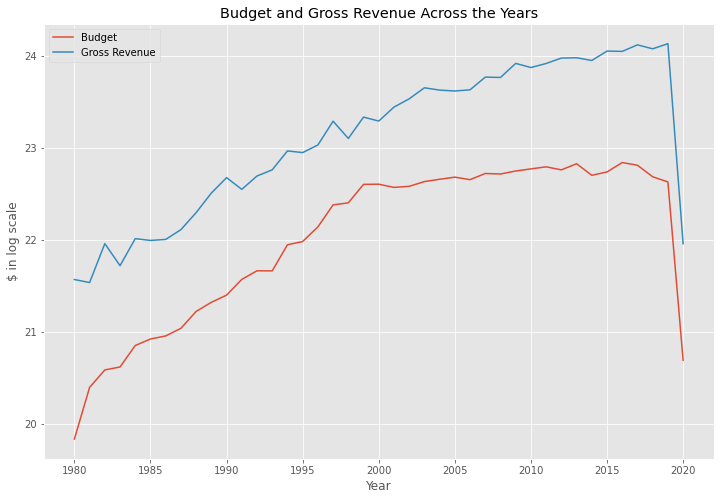

In [40]:
sns.lineplot(data=df_aggregate,x='year_corrected',y=np.log(df_aggregate['budget']['sum']))
sns.lineplot(data=df_aggregate,x='year_corrected',y=np.log(df_aggregate['gross']['sum']))
plt.title('Budget and Gross Revenue Across the Years')
plt.xlabel('Year')
plt.ylabel('$ in log scale')
plt.legend(labels=["Budget","Gross Revenue"])

In [41]:
# sudden drop of total gross and revenue of movies in 2020 can be attributed to Covid-19 pamndemic.

Text(0, 0.5, 'Total Movies Released')

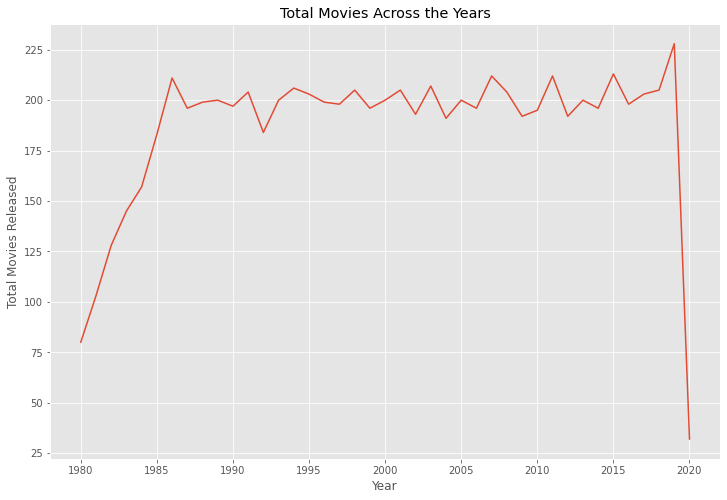

In [42]:
sns.lineplot(data=df_aggregate,x='year_corrected',y=df_aggregate['name']['count'])
plt.title('Total Movies Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Movies Released')

Text(0, 0.5, 'Mean Ratings')

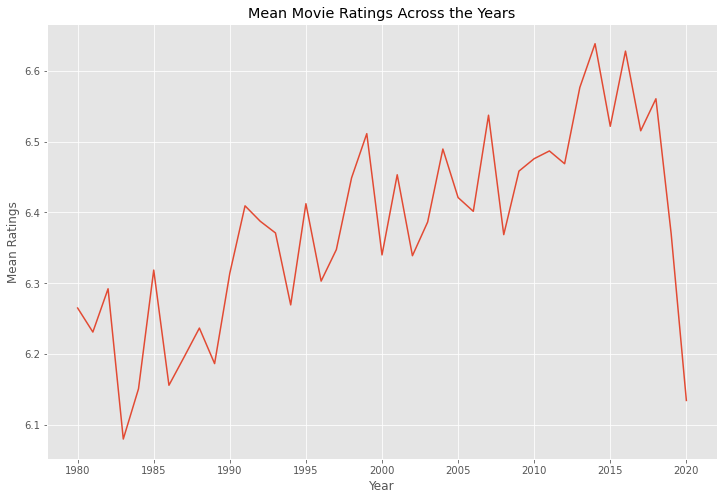

In [45]:
sns.lineplot(data=df_aggregate,x='year_corrected',y=df_aggregate['score']['mean'])
plt.title('Mean Movie Ratings Across the Years')
plt.xlabel('Year')
plt.ylabel('Mean Ratings')

In [44]:
# mean review scores or rating shard drop might be attributed to due inability of movie critics to provide ratings due to Covid-19 pandemic.